## Advanced Sorting Algorithms: QuickSort and Merge Sort

In [7]:
## Define some function useful for testing
import random

## generate an array of n random integers up to 10000
def get_random_array(n):
    return [random.randint(0, 10000) for _ in range(n)]

def test_sorting_algorithm(algorithm):
    for _ in range(100):
        A = get_random_array(random.randint(0, 1000))
        A_sorted = algorithm(A)
        if A_sorted != sorted(A):
            print(A)
        assert A_sorted == sorted(A), "FAIL!"
        
# testing testing function
test_sorting_algorithm(sorted)

## QuickSort 

Quicksort is a divide-and-conquer algorithm. It works by selecting a 'pivot' element from the array and partitioning the other elements into two sub-arrays, according to whether they are less than or greater than the pivot. The sub-arrays are then sorted recursively. This can be done **in-place**, requiring small additional amounts of memory to perform the sorting.

Thus, the most important part of QuickSort is its partition algorithm. 
Given a pivot element, the partition algorithm splits a subarray into three parts.

- Elements that are smaller than or equal to the pivot
- The pivot
- Elements that are greater than or equal to the pivot

The algorithm works in-place, i.e., it performs the partition within the subarray itself without any extra space.

![alt text](partition_algorithm.png "Partition: pseudocode")

![alt text](partition_figure.png "Figure")

![alt text](partition_running_example.png "Title")

### Exercise: binary vector
You are given a binary vector, i.e., each element is either 0 or 1. Implements an easy variant of partition to sort the vector.

***Linear***

In [32]:
import random 

binary = [random.randint(0,1) for _ in range(20)]

In [33]:
## Your implementation goes here
def my_Partition (l, first, last):
    l_new = []
    for num in l:
        l_new.append(num)   #create a new list for allowing any kind of collection 
   
    i = first - 1
    for j in range(first, last):
        if l_new[j] == 0:  #same as Quicksort, but more specific
            i+=1
            l_new[i], l_new[j] = l_new[j], l_new[i]
    l_new[i+1], l_new[last] = l_new[last], l_new[i+1]
    return l_new

In [35]:
print(binary)
my_Partition(binary, 0, len(binary)-1)

[1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

### Exercise: QuickSort
Below an implementation of QuickSort. 

In this exercise you have to:
- Write detailed comments to describe crucial parts of the code below (to prove you have understand it)
- Implement a random selection of the pivot element

In [3]:
def partition(A, low, high): 
    pivot = A[high] #at the first iteration, our pivot is the last element and this is crucial (could have been first eelement, also)
    i = low-1       # at the beginning, i points one position before j, so that
    #at the next iteration ...(see next comments)
  
    for j in range(low, high):       #from p to r (in pseudocode) --> this takes theta(n)!
        if A[j] <= pivot:            #compares the j-th element with pivot and it is <= pivot, we increment i
            i = i+1                  #increment i in order to point the correct element
            A[i], A[j] = A[j], A[i]  #swap
            
#ex. if we have 2,5,6,4: it takes the pivot (4) and compares 2 with 4: j starts at position 0, while i starts at position
#(-1). Since we enter the if statement, i is incremented and the resulting swaps is now actually not visible: we swapped
#2 with 2. Despite this, this is crucial in order to store the right position for the pointers: when it touches 5, j = 1
# and i = 1, because we don't enter the if statement. Same for 6: we increment j, but not i.


            
    A[i+1], A[high] = A[high], A[i+1] #In this way, when we SWAP, i+1 = 1 (new pivot's position), so that elements are
    #sorted w.r.t pivot --> 2,[4],5,6
    
    return i+1                        #return the index of the pivot, so that we partition recursively

In [4]:
def quickSort_rec(A, low, high):
    if low < high:                     #if the lenght of the array is at least 1 (if p < r in pseudocode, so that
        #when we have a subarray of size 1, we don't enter the if statement)
        pi = partition(A, low, high)   #pi takes the new position (i+1)
        quickSort_rec(A, low, pi-1)    #recursive call on the left part (elements <= pivot)
        quickSort_rec(A, pi+1, high)   #recursive call on the right part (elements > pivot)

#we go recursively until low == high (this depends on the pivot's position)
#thanks to recursion everything is already sorted: algorithm is in place.

In [5]:
def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A) - 1)
    return A

In [6]:
quickSort([2, 1, 4, 3])

[1, 2, 3, 4]

In [9]:
test_sorting_algorithm(quickSort)

###### Random Pivot

In [4]:
def partition_random_pivot(A, low, high):
    index = random.randint(low, high)
    

    stored = A[high]     
    A[high], A[index] = A[index], stored   
    
    pivot = A[high]     #pivot is now the last element
    
    i = low - 1
    for j in range(low, high):
            
        if A[j] <= pivot: 
            i = i+1    
             
            A[i], A[j] = A[j], A[i] #step by step i guarantee that elements are sorted according to pivot (left and right)
           
    A[i+1], A[high] = A[high], A[i+1] 
    return i+1

In [5]:
def quickSort_rec(A, low, high):
    if low < high:                     #if the lenght of the array is at least 1
        pi = partition_random_pivot(A, low, high) 
        quickSort_rec(A, low, pi-1)    #recursive call on the left part. here is the loop invariant: index i is the last position of
                                       #elements <= pivot. After, we have elements > pivot
        quickSort_rec(A, pi+1, high)

In [6]:
def quickSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    quickSort_rec(A, 0, len(A) - 1)
    return A

In [8]:
test_sorting_algorithm(quickSort)

## Let's do some experiments

Is QuickSort faster than InsertionSort and SelectionSort in practice?

T(n) = T(n-1) + D(n) + C(n)
#quicksort = T(n-1) + Theta(n) + c(constant: costs nothing)
#worst case --> theta(n^2)
#T(n) = 2T(n/2) + c*n --> worst case (come merge sort)
#Theta (nlog n ) best case

#selecting the good guy is much better than selecting the bad one. so, is there a way to select a good pivot? 
#just select a random one, what's the prob of selecting a good guy? 50%!, because  half of the element are good and half are bad.
#if it's a bad guy, no problem, with 50% prob we're selecting the good guy in th ìe next call, so the effect of calling the bad guy in the first call is calceled out
#if we have 3 pivot, the best thing is to compare them and make the median

In [1]:
def insertionSort(coll):
    A = list(coll)
    for i in range(1, len(A)):
        curr = A[i]
        j = i-1
        while j >= 0 and curr < A[j]:
            A[j+1] = A[j]
            j -= 1
        A[j+1] = curr
    return A

In [2]:
def selectionSort(coll):
    A = list(coll)
    for i in range(len(A)): 
        # Find the minimum element in remaining unsorted array 
        min_idx = i 
        for j in range(i+1, len(A)): 
            if A[min_idx] > A[j]: 
                min_idx = j 

        # Swap the found minimum element with  
        # the first element         
        A[i], A[min_idx] = A[min_idx], A[i]
    return A

In [36]:
A = get_random_array(1000)

In [37]:
%timeit quickSort(A)

2.44 ms ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [38]:
%timeit insertionSort(A)

50.7 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [39]:
%timeit selectionSort(A)

50.7 ms ± 4.79 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### More than 30x faster with arrays of length 1000. 

Try to run the experiments with an array of 10000. **Run insertion sort and selection sort just before you go to sleep.** 

### Let's see how time changes by increasing the length of the array

In [41]:
qs_t = []
is_t = []
ss_t = []

lens = [2**i for i in range(1, 11)]

for n in lens:
    A = get_random_array(n)
    result = %timeit -o quickSort(A)
    qs_t.append( result.best )
    result = %timeit -o insertionSort(A)
    is_t.append( result.best )
    result = %timeit -o selectionSort(A)
    ss_t.append( result.best )

1.59 µs ± 99 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
925 ns ± 24.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.5 µs ± 70.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.04 µs ± 59.3 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
2.06 µs ± 38.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
3.14 µs ± 58.2 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
8.88 µs ± 149 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
4.36 µs ± 205 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
7.45 µs ± 201 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
19.8 µs ± 678 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
19.8 µs ± 589 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
20.1 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
37.5 µs ± 641 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
61 µs ± 850 ns per loop (mean ± st

In [21]:
import matplotlib.pyplot as plt # standard way to import

%matplotlib inline # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic
plt.rcParams["figure.figsize"] = (20,10)
plt.style.use('ggplot')

UsageError: unrecognized arguments: # any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic


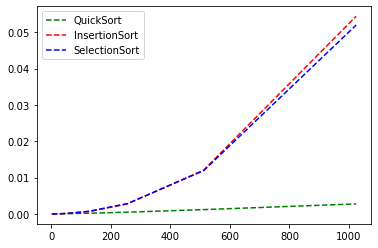

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(lens, qs_t, "g--", label="QuickSort")
ax.plot(lens, is_t, "r--", label="InsertionSort")
ax.plot(lens, ss_t, "b--", label="SelectionSort")

_ = ax.legend(loc="best")

## Merge Sort
Merge Sort is an efficient, general-purpose, comparison-based sorting algorithm. Most implementations produce a **stable sort**, which means that the order of equal elements is the same in the input and output. 

Merge sort is a divide and conquer algorithm that was invented by John von Neumann in 1945.

Below a running example.

![alt text](mergesort_figure.png "Title")

### Exercise: Merge Sort
Complete the implementation of Merge Sort by implementing function ```merge()```.

In [10]:
## Your implementation goes here

def merge(A, l, m, r): 
    N1 = m - l + 1
    N2 = r - m
    #l'algoritmo non è in place, in quanto non sappiamo DOVE si trova il
    #minimo, quindi dobbiamo inserire 2 liste per tenere i valori "stored"
    
    Left = [0 for i in range (N1)]
    Right = [0 for i in range (N2)]
        
    for i in range(N1):
        Left[i] = A[l + i] #copia di l - m
    for j in range(N2):
        Right[j] = A[m + j + 1]  #copia di m - r
        
    leftpointer = 0
    rightpointer = 0
    A_pointer = l
    while leftpointer < len(Left) and rightpointer < len(Right):
        if Left[leftpointer] <= Right[rightpointer]:
            A[A_pointer] = Left[leftpointer] #copyvaluesback
            leftpointer+= 1
            A_pointer+=1
        else:
            A[A_pointer] = Right[rightpointer]
            rightpointer+=1
            A_pointer+=1
            
    #in order not to use sentinells we have to use 2 more while loops
    while rightpointer < len(Right): #just if left part ha esaurito gli elementi 
        A[A_pointer] = Right[rightpointer]
        rightpointer+=1
        A_pointer+=1
        
    while leftpointer < len(Left):
        A[A_pointer] = Left[leftpointer]
        leftpointer+=1
        A_pointer+=1

In [11]:
def mergeSort_rec(A, l, r): 
    if len(A) <= 1: #base case, posso avere lista vuota
        return A
    
    if l < r:       
        m = (l+(r-1))//2  # Same as (l+r)//2, but avoids overflow for large l and h 
    
        # Sort first and second halves 
        mergeSort_rec(A, l, m) 
        mergeSort_rec(A, m+1, r) 
        merge(A, l, m, r)
    return A

In [12]:
A1 = [9,8,7,6,5,4,3,5,7,2,1,0]
mergeSort_rec(A1, 0, len(A1)-1 )

[0, 1, 2, 3, 4, 5, 5, 6, 7, 7, 8, 9]

In [13]:
def mergeSort(B):
    A = B[:] # Copy the array just because we decided to return a sorted copy of the original array 
    mergeSort_rec(A, 0, len(A)-1) #qui ci ho messo -1!!!
    return A

In [14]:
test_sorting_algorithm(mergeSort)

In [15]:
A = get_random_array(10000)

In [16]:
%timeit quickSort(A)

26.6 ms ± 421 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit mergeSort(A)

78 ms ± 570 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
